## Square foot price analysis

In [13]:
# Imports
import pandas as pd
import functions as fc
import matplotlib.pyplot as plt
from itertools import groupby
from sklearn.linear_model import LinearRegression

# Read input file
sales_frame = fc.read_csv("data/nyc-rolling-sales_2003adj.csv")
#print(sales_frame.head())
#print(len(sales_frame))

# Adjusting Sale Price manually
sales_frame = sales_frame[sales_frame["LAND SQUARE FEET"] > 0]
sales_frame_adj = sales_frame[sales_frame["SALE PRICE"] > 0]
#print(len(sales_frame_adj))

# Adjusting for GSF > 0
sales_frame_gsf_adj = sales_frame_adj[sales_frame_adj["GROSS SQUARE FEET"] > 0]
#print(len(sales_frame_gsf_adj))

## Price per square foot (from GSF)

In [14]:
sales_frame_gsf_adj["PRICE PER SQUARE FOOT"] = sales_frame_gsf_adj["SALE PRICE"] / sales_frame_gsf_adj["GROSS SQUARE FEET"]
sales_frame_gsf_adj.reset_index(drop=True, inplace=True)
print(sales_frame_gsf_adj)

ppsm_mean = sales_frame_gsf_adj["PRICE PER SQUARE FOOT"].mean()
print("The average price per square foot in New York is $", round(ppsm_mean), " per square meter.", sep="")

         BOROUGH               NEIGHBORHOOD  \
0      Manhattan  ALPHABET CITY               
1      Manhattan  ALPHABET CITY               
2      Manhattan  ALPHABET CITY               
3      Manhattan  ALPHABET CITY               
4      Manhattan  ALPHABET CITY               
...          ...                        ...   
34313  The Bronx  SO. JAMAICA-BAISLEY PARK    
34314  The Bronx  SO. JAMAICA-BAISLEY PARK    
34315  The Bronx  SO. JAMAICA-BAISLEY PARK    
34316  The Bronx  SO. JAMAICA-BAISLEY PARK    
34317  The Bronx  SO. JAMAICA-BAISLEY PARK    

                            BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0      02  TWO FAMILY HOMES                                            1   
1      07  RENTALS - WALKUP APARTMENTS                                2B   
2      07  RENTALS - WALKUP APARTMENTS                                2B   
3      07  RENTALS - WALKUP APARTMENTS                                2B   
4      07  RENTALS - WALKUP APARTMENTS                 

C:\Users\Dome\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Price per square meter per borough (GSF)

     BOROUGH  AVERAGE PRICE PER SQUARE METER
0   Brooklyn                      427.166787
1  Manhattan                      659.749214
2     Queens                      394.422322
3  The Bronx                      240.852787


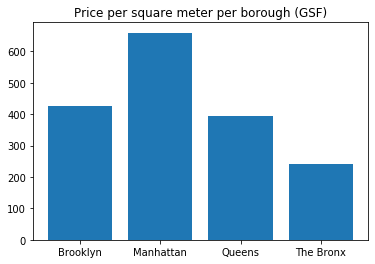

In [15]:
sales_frame_gsf_adj_grouped = sales_frame_gsf_adj.groupby(["BOROUGH"])
sales_frame_gsf_adj_grouped_gsf = sales_frame_gsf_adj_grouped["PRICE PER SQUARE FOOT"].mean().reset_index(name ="AVERAGE PRICE PER SQUARE METER")
print(sales_frame_gsf_adj_grouped_gsf)

# plotting price per square meter (GSF)
xs = sales_frame_gsf_adj_grouped_gsf["BOROUGH"]
ys = sales_frame_gsf_adj_grouped_gsf["AVERAGE PRICE PER SQUARE METER"]

plt.bar(xs, ys)
plt.title("Price per square meter per borough (GSF)")
plt.savefig("data/Price per square meter per borough (GSF).jpg", bbox_inches="tight")
plt.show()

## Price per square foot (from LSF)

In [16]:
sales_frame_adj["PRICE PER SQUARE FOOT"] = sales_frame_adj["SALE PRICE"] / sales_frame_adj["LAND SQUARE FEET"]
sales_frame_adj.reset_index(drop=True, inplace=True)
#print(sales_frame_adj)

pplm_mean = sales_frame_adj["PRICE PER SQUARE FOOT"].mean()
print("The average price per square foot in New York is $", round(pplm_mean), " per square meter.", sep="")

The average price per square foot in New York is $182 per square meter.


## Price per square meter per borough (LSF)

         BOROUGH  AVERAGE PRICE PER SQUARE METER
0       Brooklyn                      127.694800
1      Manhattan                      968.406583
2         Queens                      182.643066
3  Staten Island                      120.639389
4      The Bronx                      161.014339


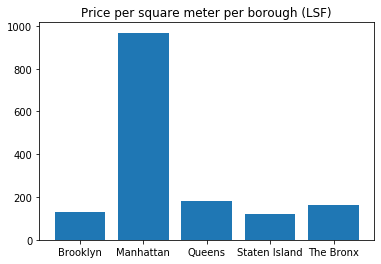

In [17]:
sales_frame_adj_grouped = sales_frame_adj.groupby(["BOROUGH"])
sales_frame_adj_grouped_lsf = sales_frame_adj_grouped["PRICE PER SQUARE FOOT"].mean().reset_index(name ="AVERAGE PRICE PER SQUARE METER")
print(sales_frame_adj_grouped_lsf)

# plotting price per square meter (LSF)
xq = sales_frame_adj_grouped_lsf["BOROUGH"]
yq = sales_frame_adj_grouped_lsf["AVERAGE PRICE PER SQUARE METER"]

plt.bar(xq, yq)
plt.title("Price per square meter per borough (LSF)")
plt.savefig("data/Price per square meter per borough (LSF).jpg", bbox_inches="tight")
plt.show()

## What are the expensive Neighborhoods in Manhattan (LSF)

                 NEIGHBORHOOD  AVERAGE PRICE PER SQUARE METER
0   MIDTOWN CBD                                       8437.86
1   MIDTOWN EAST                                      2903.78
2   UPPER EAST SIDE (59-79)                           2428.67
3   UPPER WEST SIDE (59-79)                           2045.50
4   SOHO                                              1907.65
5   GREENWICH VILLAGE-WEST                            1760.78
6   FLATIRON                                          1610.83
7   UPPER EAST SIDE (79-96)                           1582.09
8   FINANCIAL                                         1536.13
9   MIDTOWN WEST                                      1524.68
10  TRIBECA                                           1412.58
11  FASHION                                           1357.42
12  MURRAY HILL                                       1317.13
13  UPPER WEST SIDE (79-96)                           1262.95
14  CIVIC CENTER                                      1114.87
15  GREE

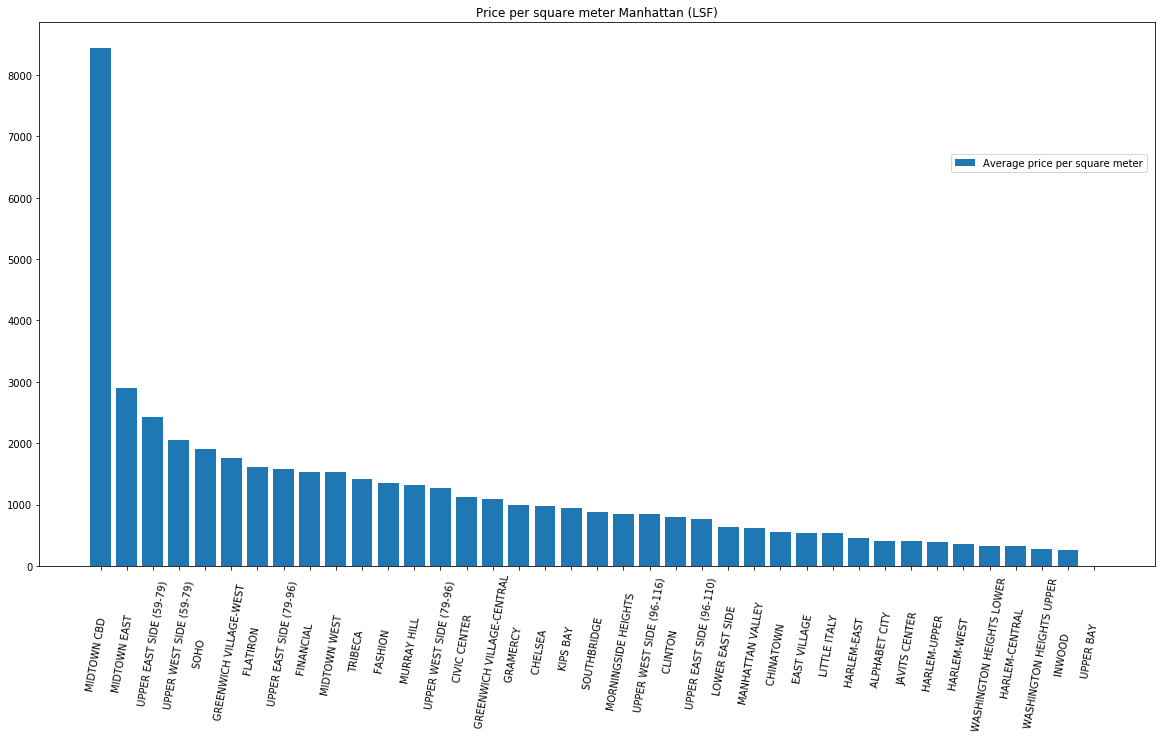

In [18]:
sales_frame_manhattan = sales_frame_adj[sales_frame_adj["BOROUGH"] == "Manhattan"]
sales_frame_man_grouped = sales_frame_manhattan.groupby(["NEIGHBORHOOD"])
sales_frame_man_grouped_lsf = sales_frame_man_grouped["PRICE PER SQUARE FOOT"].mean().reset_index(name ="AVERAGE PRICE PER SQUARE METER")
sales_frame_man_grouped_lsf = sales_frame_man_grouped_lsf.sort_values(by="AVERAGE PRICE PER SQUARE METER", ascending=False)
sales_frame_man_grouped_lsf = sales_frame_man_grouped_lsf.reset_index(drop=True)
pd.options.display.float_format = '{:.2f}'.format
print(sales_frame_man_grouped_lsf)

# plotting price per square meter (LSF)
xr = sales_frame_man_grouped_lsf["NEIGHBORHOOD"]
yr = sales_frame_man_grouped_lsf["AVERAGE PRICE PER SQUARE METER"]

plt.bar(xr, yr)
plt.title("Price per square meter Manhattan (LSF)")
plt.xticks(rotation=80)
plt.gcf().set_size_inches(20, 10)
plt.figlegend(('Average price per square meter',),loc='center right', bbox_to_anchor=(0.8, 0.8))
plt.savefig("data/Price per square meter Manhattan (LSF).jpg", bbox_inches="tight")
plt.show()

